## Writing a video using OpenCV
While building applications, it becomes important to save demo videos of your work as well as many applications themselves might require saving a video clip. For example, in a surveiallance application, you might have to save a video clip as soon as you see something unusual happening.

In this notebook, we will describe how to save a video in **avi** and **mp4** formats using openCV.

In [1]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

##  <font style="color:black">Download Assets</font>

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

## Read Video from Source

In [25]:
source = 'race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [26]:
if not cap.isOpened():
    print("Error opening video stream or file")

In [29]:
print(type(cap))

<class 'cv2.VideoCapture'>


### <font color="green">Read and display one frame </font>

In [17]:
ret, frame = cap.read()

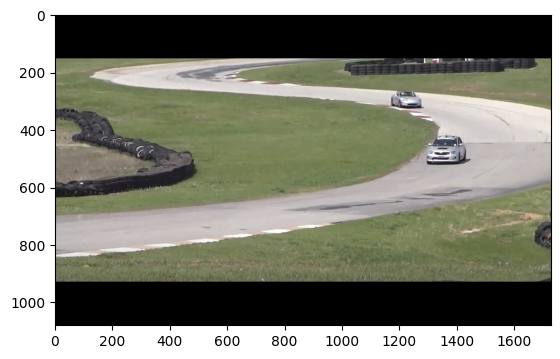

In [18]:
plt.imshow(frame[..., ::-1])
plt.show()

### <font color="green">Display the video file </font>

In [11]:
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

## Write Video using OpenCV
For writing the video, you need to create a videowriter object with the right parameters.

### <font color="green">Function Syntax</font>

```python
VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )
```
where,
**Parameters**

1. `filename`: Name of the output video file.

2. `fourcc`: 4-character code of codec used to compress the frames. For example, `VideoWriter::fourcc('P','I','M','1')` is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.

3. `fps`: Framerate of the created video stream.

4. `frameSize`: Size of the video frames.

In [19]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_width, frame_height)

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

1728 1080


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


### <font color="green">Read frames and write to file</font>
We will read the frames from the race-car video and write the same to the two objects we created in the previous step. We should release the objects after the task is complete.

In [20]:
# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break

In [21]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

To display video on Google Colab, we will install and use the `ffmpeg` package. Using `ffmpeg` we will change the encoding of the `.mp4` file from XVID to H264

HTML 5 can properly render videos with H264 encoding and OpenCV doesn't have that encoding yet. That's why we need to change their encodings such that they can be rendered.

In [ ]:
# Installing ffmpeg

!apt-get -qq install ffmpeg

Currently, HTML5 only suports renedering of MP4 files, so we'll only change the encoding of the `race_car_out.mp4` file.

In [23]:
# Change video encoding of mp4 file from XVID to h264
!ffmpeg -y -i "race_car_out.mp4" -c:v libx264 "race_car_out_x264.mp4"  -hide_banner -loglevel error

这段代码使用 **FFmpeg** 工具将 `race_car_out.mp4` 视频的编码格式从 **XVID（MPEG-4 Part 2）转换为 H.264（x264）**，并输出为 `race_car_out_x264.mp4`。以下是详细解析：

---

### **1. 命令分解**
```bash
ffmpeg \
  -y \                    # 自动覆盖输出文件（无需确认）
  -i "race_car_out.mp4" \ # 输入文件
  -c:v libx264 \          # 视频编码器：H.264（x264）
  "race_car_out_x264.mp4" # 输出文件名
  -hide_banner \          # 隐藏FFmpeg版本信息
  -loglevel error         # 只显示错误日志（静默模式）
```

---

### **2. 关键参数说明**
| 参数 | 作用 |
|------|------|
| `-y` | 直接覆盖输出文件（不提示确认）。 |
| `-i "race_car_out.mp4"` | 指定输入视频文件。 |
| `-c:v libx264` | 设置视频编码器为 **H.264（x264 库）**。 |
| `"race_car_out_x264.mp4"` | 输出文件名（默认封装为MP4）。 |
| `-hide_banner` | 隐藏FFmpeg的版本和编译信息。 |
| `-loglevel error` | 仅显示错误日志（减少输出干扰）。 |

---

### **3. 编码转换的作用**
- **XVID → H.264**：
  - **XVID**：较旧的MPEG-4编码，兼容性好但压缩效率低。
  - **H.264（x264）**：现代编码标准，相同画质下文件更小，广泛支持（如网页、手机）。
- **适用场景**：
  - 减小视频体积（H.264压缩率更高）。
  - 提升流媒体兼容性（H.264是主流格式）。

---

### **4. 注意事项**
1. **音频流处理**：
   - 默认情况下，FFmpeg会 **直接复制音频流**（`-c:a copy`），不重新编码。
   - 如需重新编码音频，可添加 `-c:a aac`。
2. **画质控制**：
   - 默认使用x264的**中等预设（CRF 23）**，平衡画质和文件大小。
   - 如需调整画质，可添加参数：
     ```bash
     -crf 18 \          # 更低CRF=更高画质（18~28常见）
     -preset slower \   # 更慢编码=更好压缩（可选：ultrafast, fast, medium, slow）
     ```
3. **完整示例（高画质版）**：
   ```bash
   ffmpeg -y -i "race_car_out.mp4" -c:v libx264 -crf 18 -preset slow -c:a aac "race_car_out_x264.mp4" -hide_banner -loglevel error
   ```

---

### **5. 验证输出**
- 检查视频编码：
  ```bash
  ffprobe -v error -select_streams v:0 -show_entries stream=codec_name -of default=noprint_wrappers=1:nokey=1 "race_car_out_x264.mp4"
  ```
  输出应为：  
  ```
  h264
  ```

---

### **总结**
这段代码通过 FFmpeg 将视频从 **XVID 转码为 H.264**，优化压缩效率，适用于：
- 减少文件大小
- 提高兼容性（如上传到YouTube、微信等平台）
- 标准化视频编码格式

Render MP4 Video

In [24]:
mp4 = open("race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")

这段代码的作用是 **将MP4视频文件嵌入到Jupyter Notebook（或HTML页面）中，并以内联方式直接播放视频**。以下是逐步解析：

---

### **1. 代码分解**
```python
# 1. 以二进制模式读取MP4文件
mp4 = open("race_car_out_x264.mp4", "rb").read()

# 2. 将二进制数据转换为Base64编码，并生成Data URL
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# 3. 创建HTML视频播放标签并显示
HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")
```

---

### **2. 关键步骤说明**
#### **(1) 读取视频文件**
```python
mp4 = open("race_car_out_x264.mp4", "rb").read()
```
- `"rb"`：以二进制模式打开文件。
- `.read()`：将整个文件内容读取为二进制数据（`bytes`对象）。

#### **(2) 生成Base64 Data URL**
```python
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
```
- `b64encode(mp4)`：使用Base64编码二进制视频数据。
- `.decode()`：将Base64字节流转换为字符串。
- 最终生成符合规范的Data URL格式：  
  `data:video/mp4;base64,<Base64字符串>`

#### **(3) 创建HTML视频播放器**
```python
HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")
```
- `<video>`：HTML5视频标签。
  - `width=700`：设置播放器宽度。
  - `controls`：显示播放控件（暂停、音量等）。
- `<source>`：指定视频源为Base64 Data URL，类型为`video/mp4`。

---

### **3. 技术背景**
#### **为什么用Base64 Data URL？**
- **直接嵌入数据**：无需额外视频文件（所有数据包含在HTML中）。
- **适用于临时展示**：在Jupyter Notebook或网页中即时预览，避免文件路径依赖。
- **注意**：Base64编码会使数据体积增大约33%，**不适合大视频文件**（建议小于几十MB）。

#### **对比传统文件引用**
```html
<!-- 传统方式（需单独文件） -->
<video controls>
  <source src="race_car_out_x264.mp4" type="video/mp4">
</video>
```

---

### **4. 常见问题**
#### **Q1: 视频无法播放？**
- 可能原因：
  1. 文件路径错误（确保`race_car_out_x264.mp4`存在）。
  2. 视频编码不兼容（需H.264编码的MP4，与之前`ffmpeg`转码一致）。
  3. Base64数据损坏（检查文件是否完整）。

#### **Q2: 如何调整视频大小？**
- 修改`width`属性（如`width=500`）或添加`height`：
  ```html
  <video width=500 height=300 controls>...</video>
  ```

#### **Q3: 支持其他视频格式吗？**
- 需修改`type`属性（如WebM格式）：
  ```html
  <source src="data:video/webm;base64,..." type="video/webm">
  ```

---

### **5. 完整示例**
```python
from base64 import b64encode
from IPython.display import HTML

# 读取视频并转换为Base64
video_path = "race_car_out_x264.mp4"
mp4 = open(video_path, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# 嵌入播放器
HTML(f"""
<video width=700 controls autoplay loop>
  <source src="{data_url}" type="video/mp4">
  Your browser does not support HTML5 video.
</video>
""")
```
**效果**：直接在Notebook中显示可交互的视频播放器。

---

### **总结**
这段代码实现了：  
1. **视频文件 → 二进制读取**  
2. **二进制 → Base64编码 → Data URL**  
3. **通过HTML5标签内联播放**  

适用于快速预览、分享分析结果或创建自包含的交互式报告。

The video rendered in the above cell should be the same as the following.

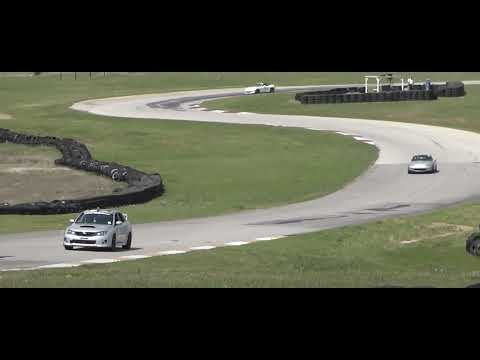

In [ ]:
video = YouTubeVideo("2Gju7YLfkP0", width=700, height=438)
display(video)

## Thank You!